# Full Class Distribution Analysis

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
from configs.scannet_constants import *
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

In [2]:
load = np.load("../../Downloads/class_dist_advanced.npy", allow_pickle='TRUE').item()

In [3]:
class_ids = list(load.keys())
class_vals = []
for key in load.keys():
    class_vals.append(load[key]["sum"])

## Quick Analysis

['Undefined', 'wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa', 'table', 'door', 'window', 'bookshelf', 'picture', 'counter', 'desk', 'curtain', 'refrigerator', 'shower curtain', 'toilet', 'sink', 'bathtub', 'otherfurniture']


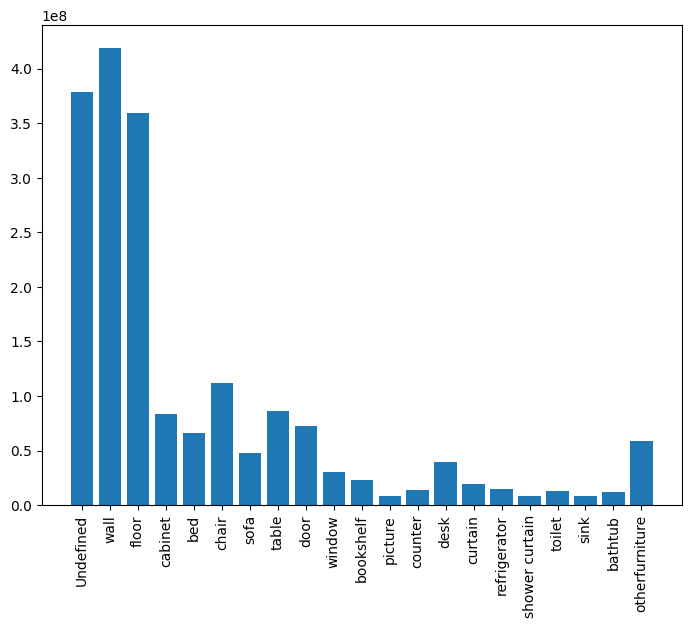

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = list(tuple('i')+CLASS_LABELS_20)
classes[0]="Undefined"
print(classes)
plt.xticks(rotation='vertical')
ax.bar(classes,class_vals)
plt.show()

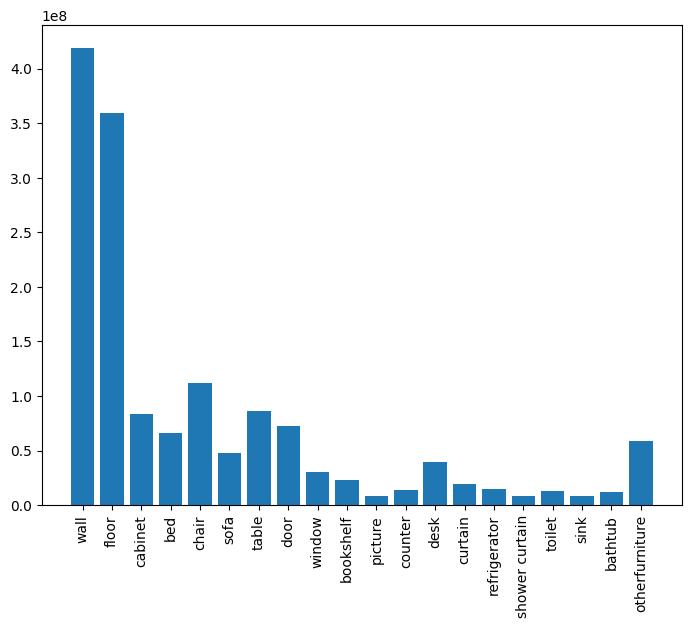

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(classes[1:],class_vals[1:])
plt.show()

In [12]:
quick_sum = {}
for i, id in enumerate(class_ids):
    quick_sum[id]=class_vals[i]
df = pd.DataFrame(quick_sum.items(), columns=["Class","Values"])
df.loc['Total'] = pd.Series(df['Values'].sum(), index=['Values'])
df['Percentage'] = df['Values']/df['Values'].sum() *200
df['Class'] = classes+["Name"]
sorted_list = df.sort_values(by='Values', ascending=False)
display(sorted_list)

,Class,Values,Percentage
Total,Name,1.874627e+09,100.000000
1,wall,4.192016e+08,22.361875
0,Undefined,3.791429e+08,20.224981
2,floor,3.597372e+08,19.189806
5,chair,1.118916e+08,5.968739
7,table,8.666534e+07,4.623072
3,cabinet,8.331237e+07,4.444212
8,door,7.204346e+07,3.843083
4,bed,6.618683e+07,3.530668
20,otherfurniture,5.884507e+07,3.139029


## Indepth class Analysis

### For Different Classes

In [7]:
print("Class 0", load[0]["sum"])
scene_id = list(load[0]["scenes"].keys())[0]
print("Poses", load[0]["scenes"][scene_id]["sum"])

Class 0 379142854
Poses 538521


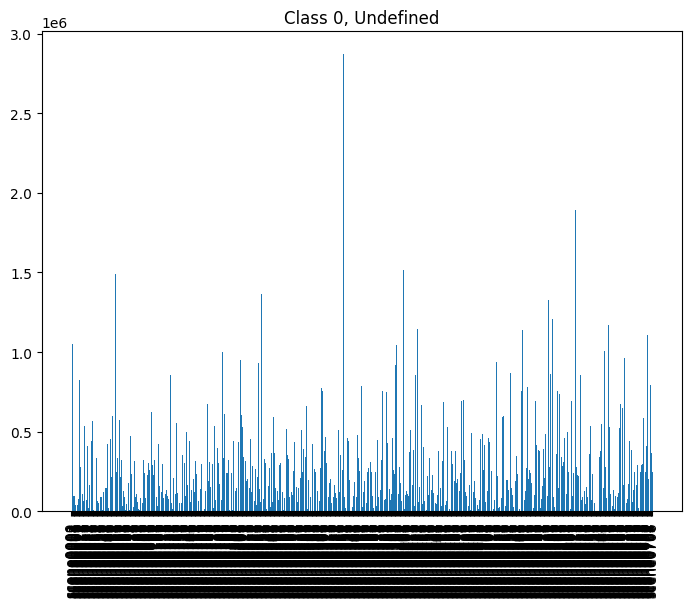

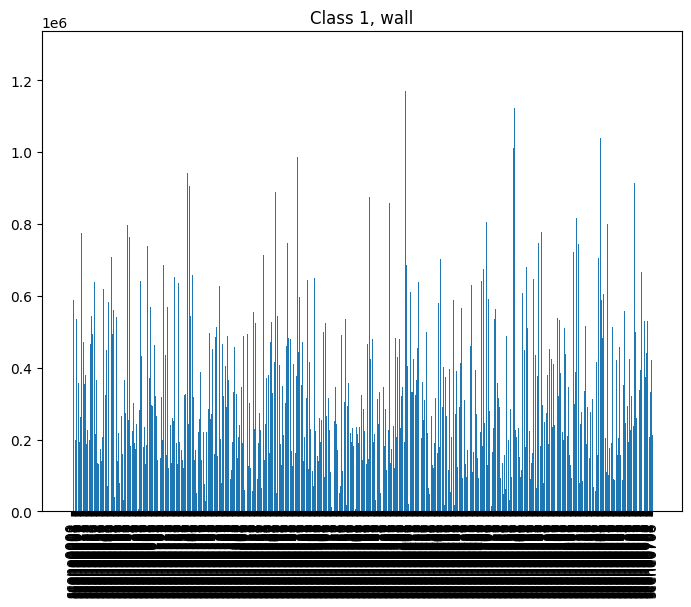

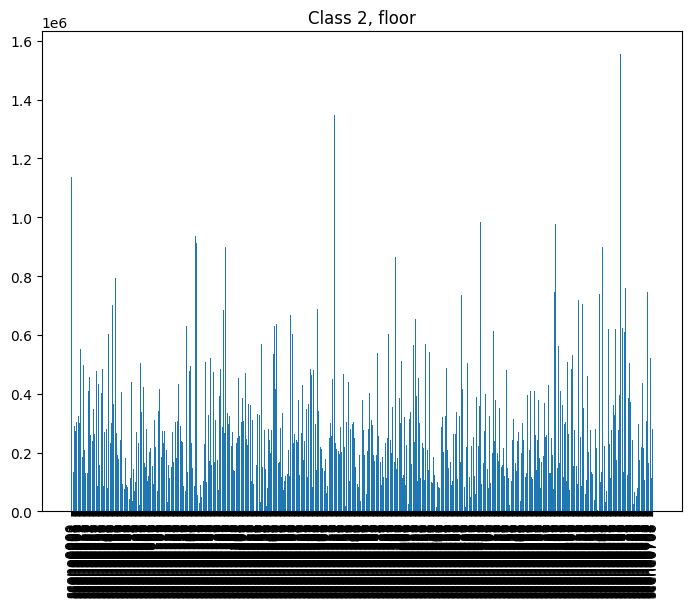

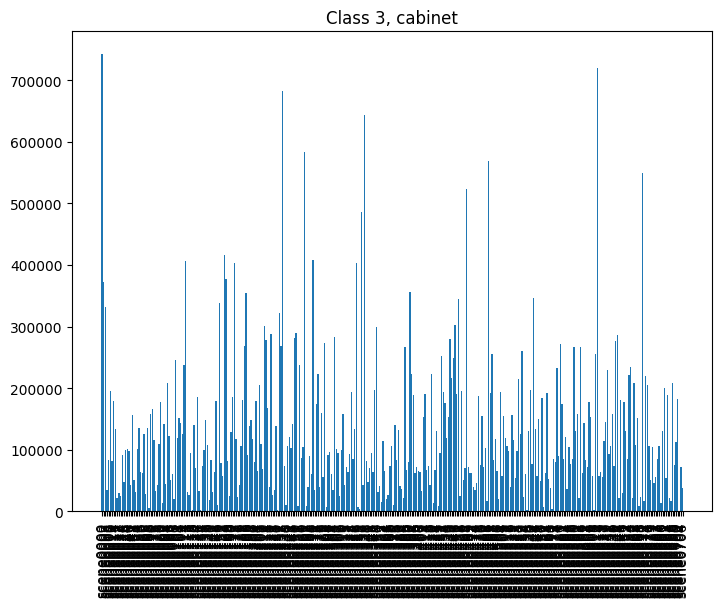

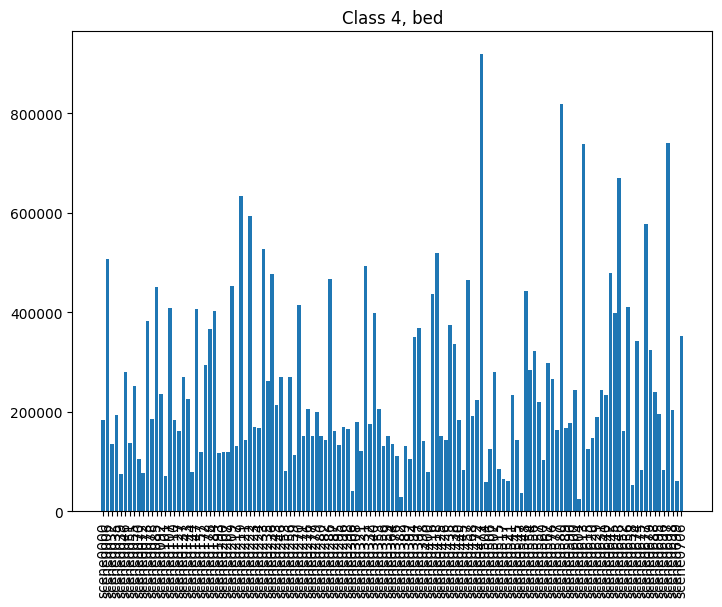

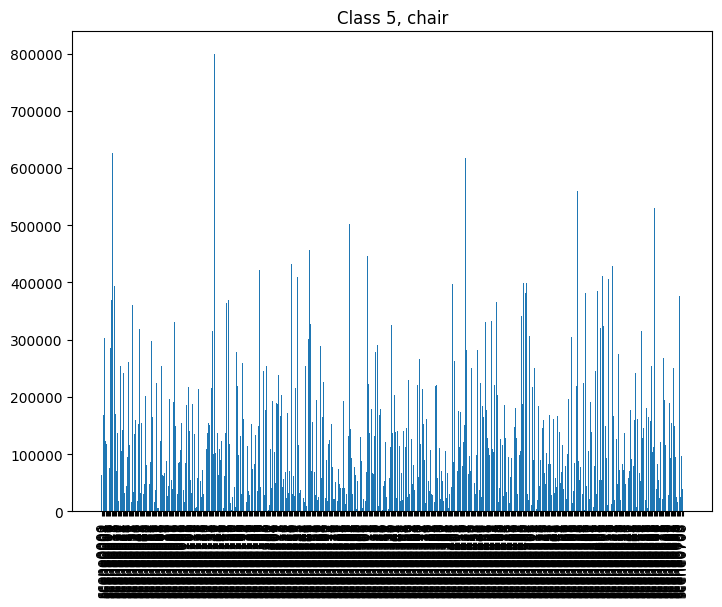

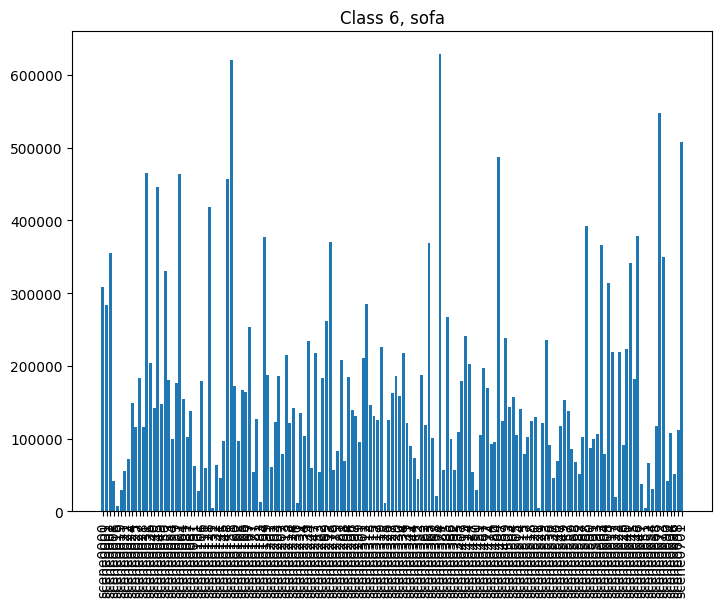

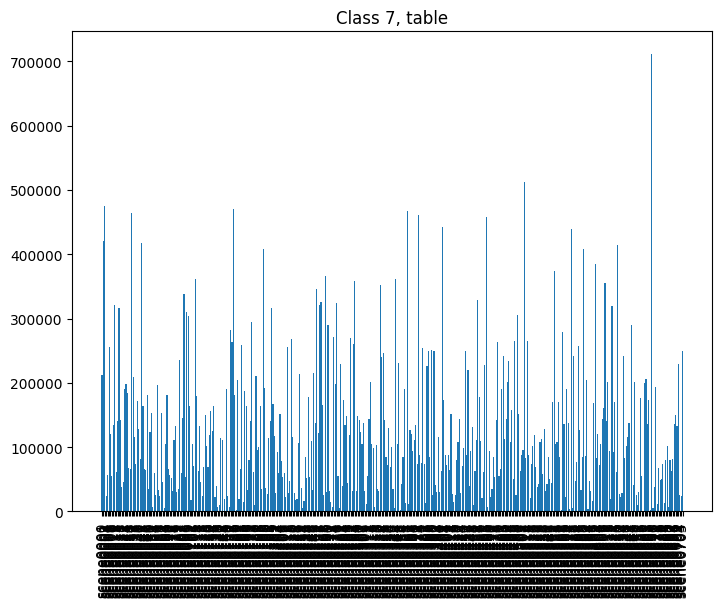

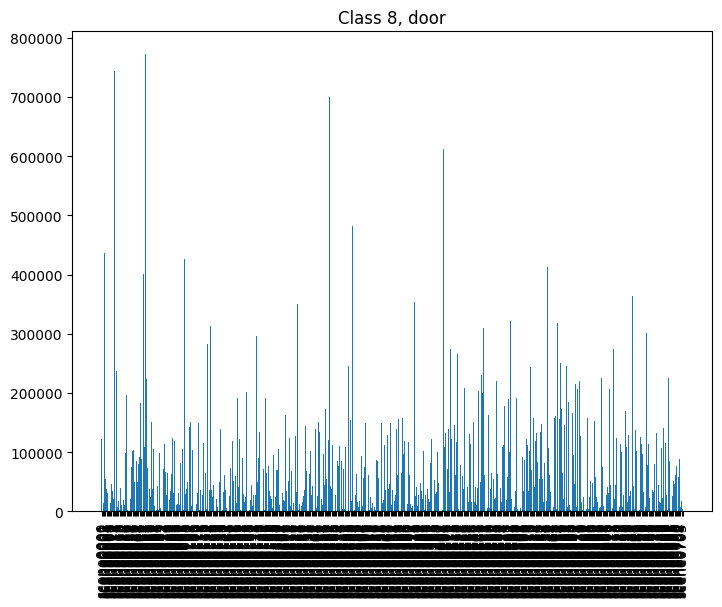

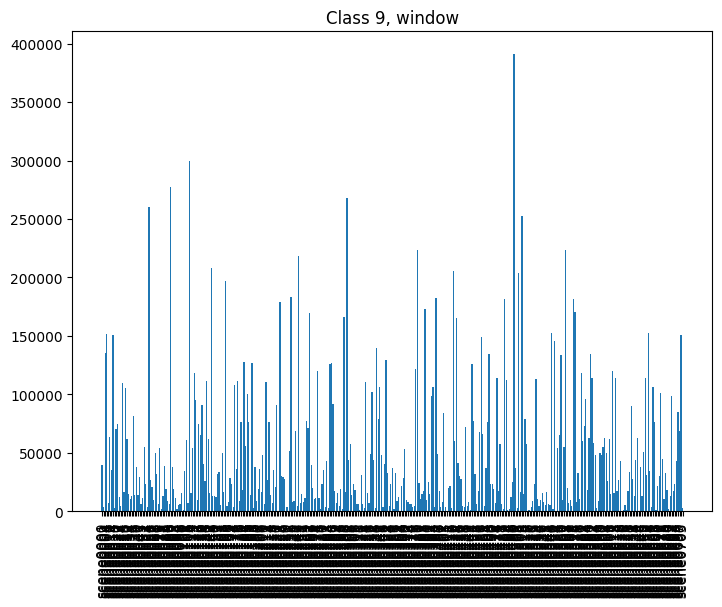

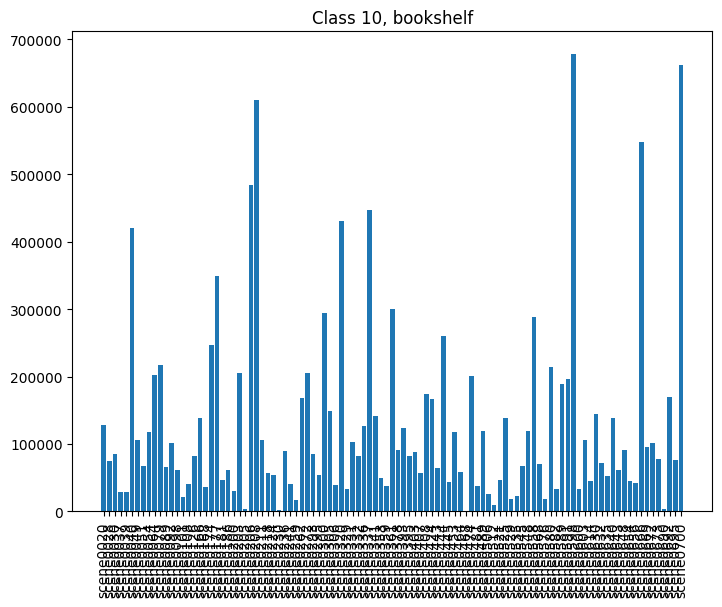

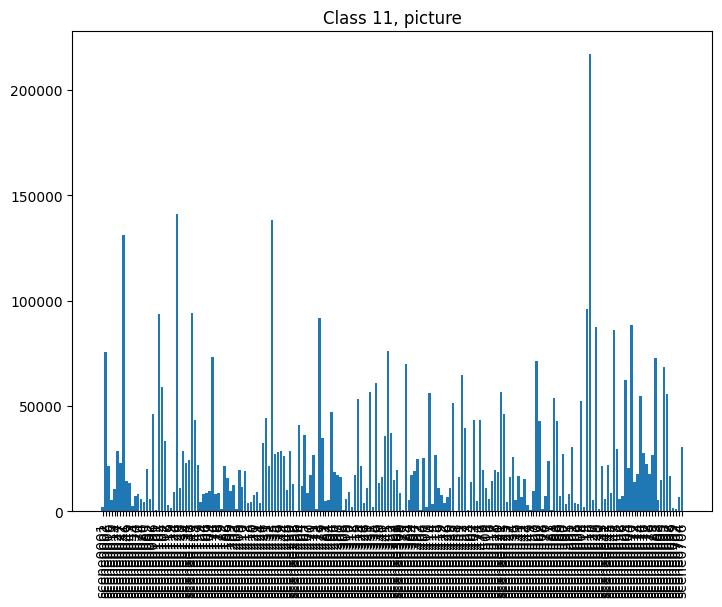

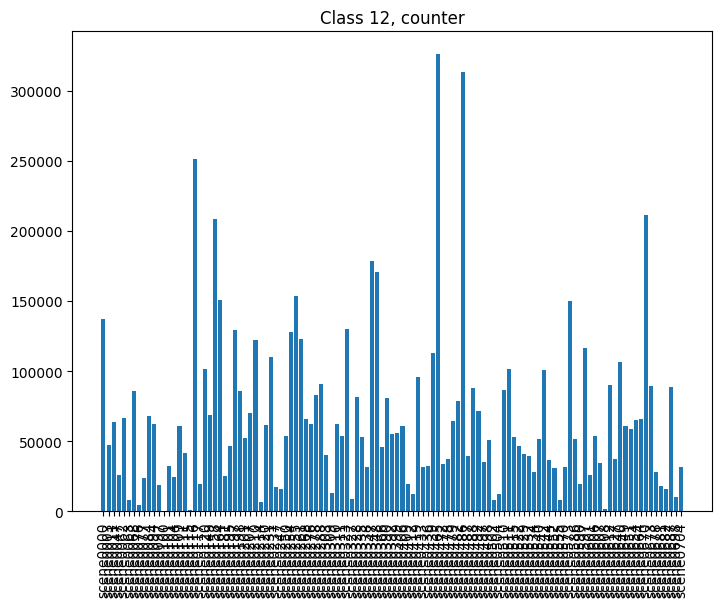

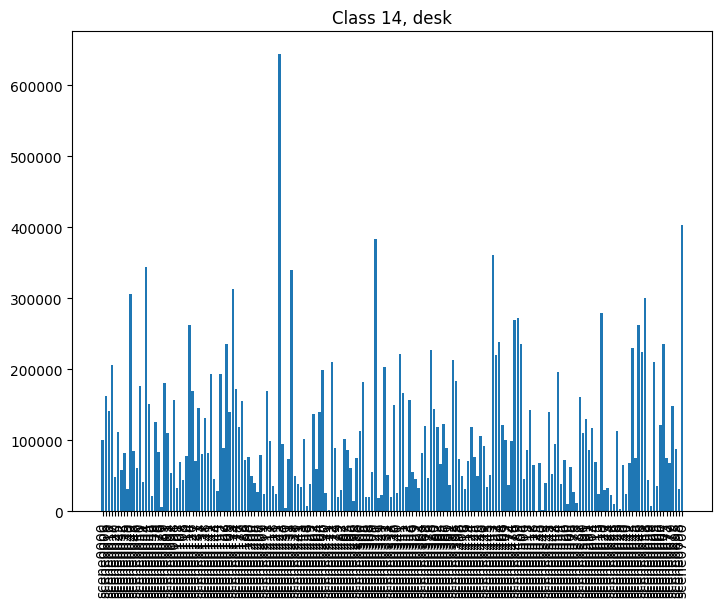

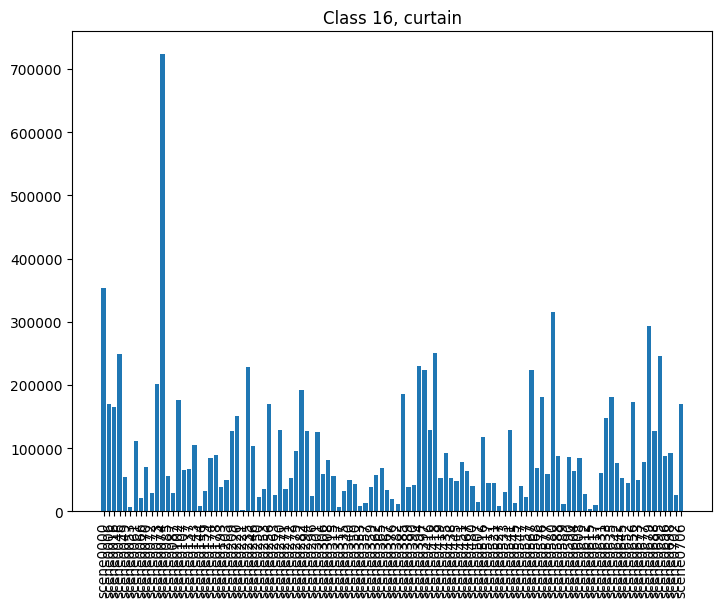

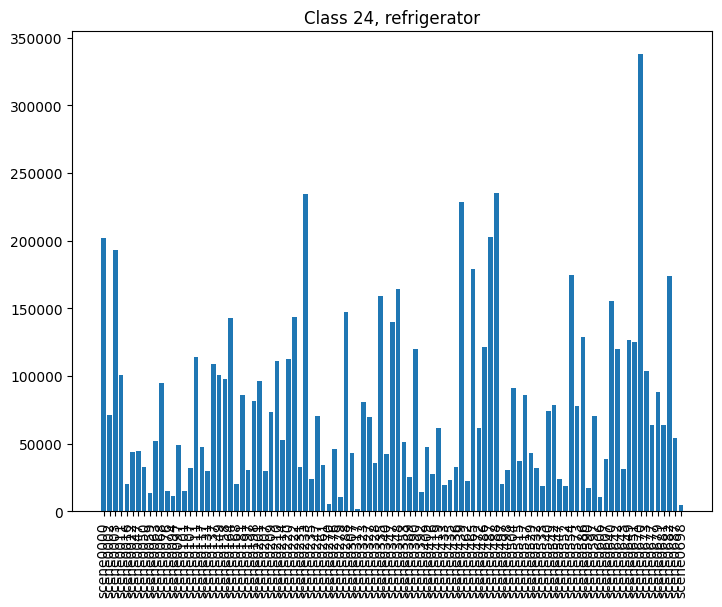

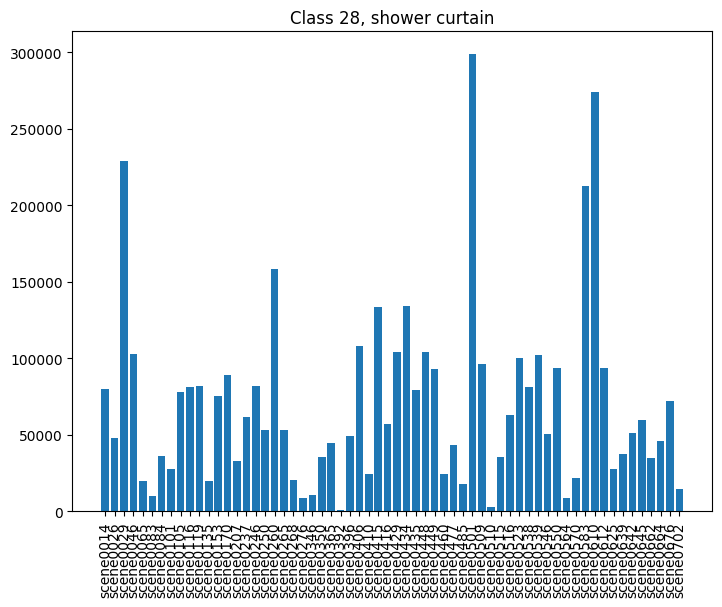

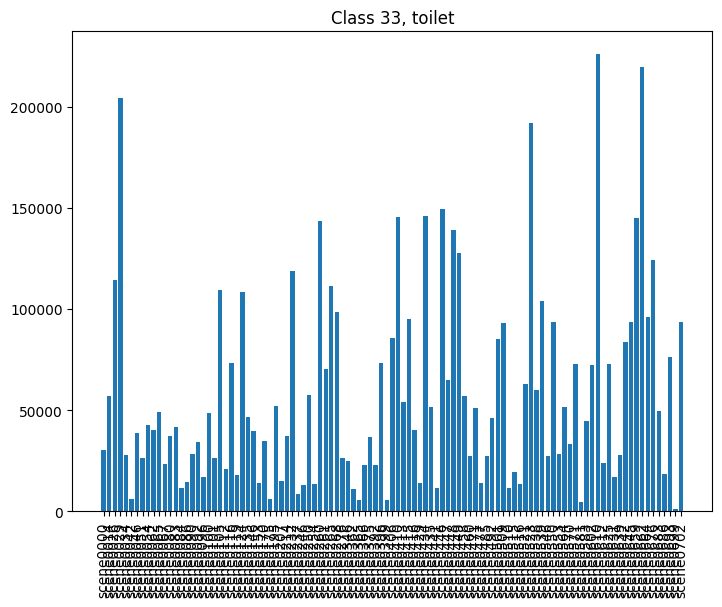

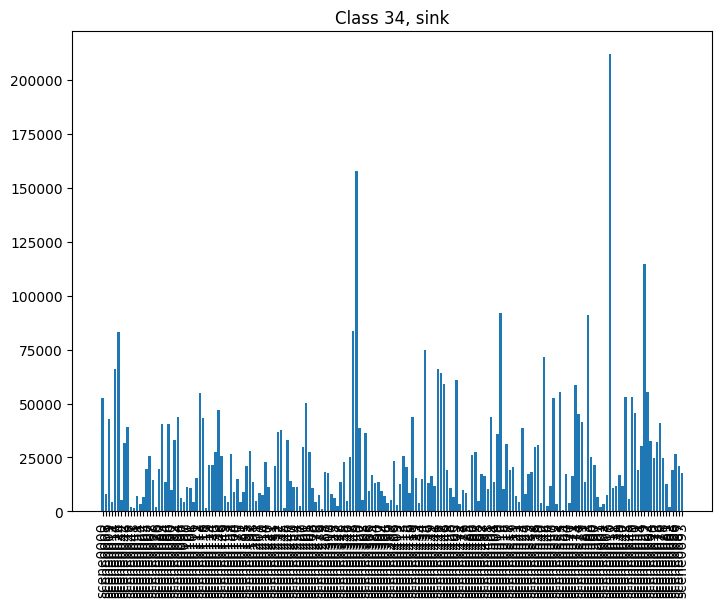

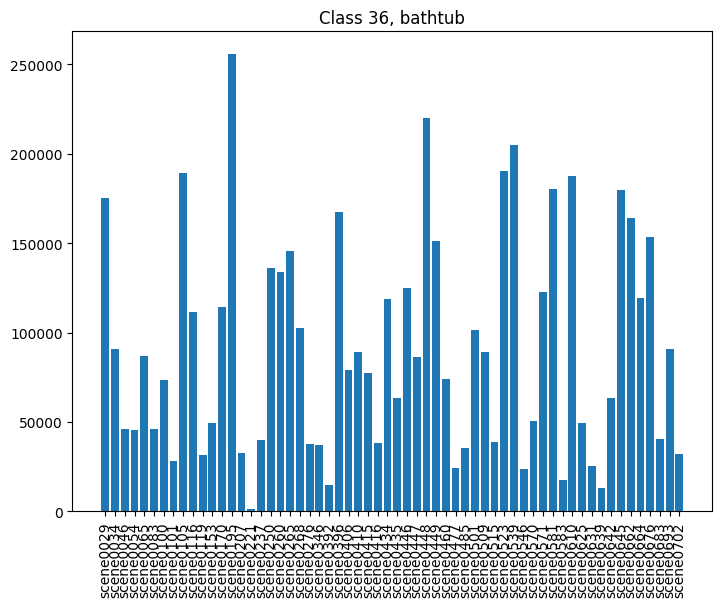

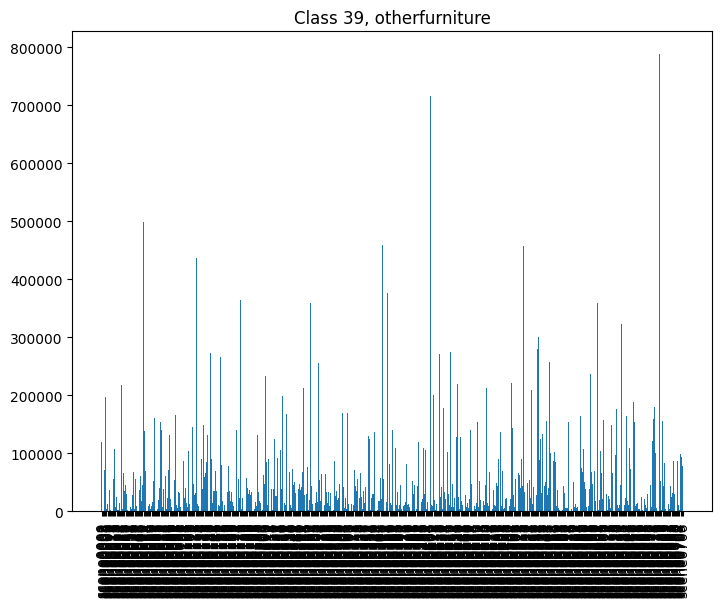

In [8]:
for k_idx, class_key in enumerate(load.keys()):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    poses = list(load[class_key]["scenes"].keys())
    for i, pose in enumerate(poses):
        poses[i] = poses[i].split("_")[-2]
    pose_sums = []
    for pose in list(load[class_key]["scenes"].keys()):
        pose_sums.append(load[class_key]["scenes"][pose]["sum"])
    plt.title(label=f"Class {str(class_key)}, {classes[k_idx]}")
    plt.xticks(rotation='vertical')
    ax.bar(poses,pose_sums)
    plt.show()

## Analysis of the smallest classes

In [9]:
least_4 = sorted.iloc[-4:]
display(least_4)

for Class in least_4['Class']:
    print(Class)
    class_key = int(Class)
    print(load[class_key]['sum']) 
    print("Scenes List:")
    for k in load[class_key]['scenes'].keys():
        print(k,":",load[class_key]['scenes'][k]['sum'])


,Class,Values,Percentage
19,36.0,12112551.0,0.646131
11,11.0,8678681.0,0.462955
16,28.0,8675174.0,0.462768
18,34.0,8031682.0,0.428442


36.0
12112551
Scenes List:
plenoxel_scannet_scene0029_00 : 151309
plenoxel_scannet_scene0029_01 : 175147
plenoxel_scannet_scene0029_02 : 112718
plenoxel_scannet_scene0034_00 : 52056
plenoxel_scannet_scene0034_01 : 90915
plenoxel_scannet_scene0034_02 : 45380
plenoxel_scannet_scene0046_00 : 43808
plenoxel_scannet_scene0046_01 : 46241
plenoxel_scannet_scene0046_02 : 35386
plenoxel_scannet_scene0054_00 : 45745
plenoxel_scannet_scene0065_00 : 58558
plenoxel_scannet_scene0065_01 : 64034
plenoxel_scannet_scene0065_02 : 87062
plenoxel_scannet_scene0083_00 : 46081
plenoxel_scannet_scene0083_01 : 24056
plenoxel_scannet_scene0100_00 : 14485
plenoxel_scannet_scene0100_01 : 73576
plenoxel_scannet_scene0100_02 : 34053
plenoxel_scannet_scene0101_00 : 19160
plenoxel_scannet_scene0101_01 : 28321
plenoxel_scannet_scene0101_02 : 20783
plenoxel_scannet_scene0105_00 : 170702
plenoxel_scannet_scene0105_01 : 189276
plenoxel_scannet_scene0105_02 : 75330
plenoxel_scannet_scene0116_00 : 95626
plenoxel_scannet_s